<a href="https://colab.research.google.com/github/aidanmwood/data-analysis/blob/main/BostonCrimeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 

#Load Data

##Mount Drive

In [47]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Find Directory

In [48]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


##Load File

In [49]:
crime_df = pd.read_csv('crime.csv', encoding='latin1')

crime_df

<ipython-input-49-e7c6825820d1>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('crime.csv', encoding='latin1')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327815,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
327816,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
327817,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
327818,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


#Crimes Per Day

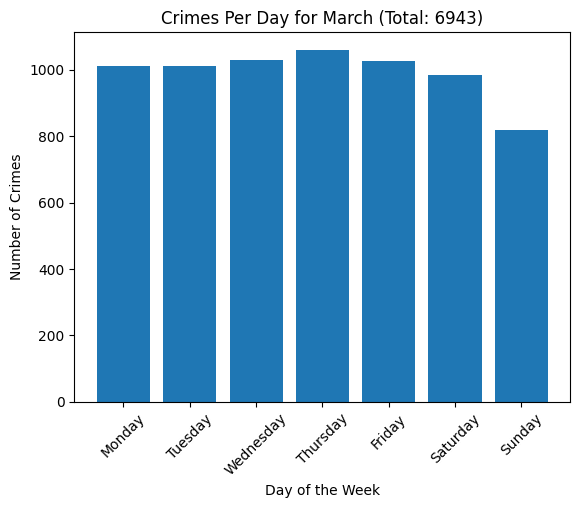

In [50]:
def daily_crime_graph(year, month):
  test = crime_df.groupby(['YEAR','MONTH', 'DAY_OF_WEEK'])
  test2 = crime_df.groupby(['YEAR', 'MONTH'])

  days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  crimes_per_day = []

  for day in days:
    total_crimes = len(test2.get_group((year, month)))
    crimes = len(test.get_group((year, month, day)))

    crimes_per_day.append(crimes)

  month_word = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

  plt.bar(days, crimes_per_day, linewidth=0)
  plt.xticks(rotation=45)
  plt.title(f'Crimes Per Day for {month_word[month]} (Total: {total_crimes})')
  plt.ylabel('Number of Crimes')
  plt.xlabel('Day of the Week')
  plt.show()

daily_crime_graph(2018, 2)

#Crimes Per Month

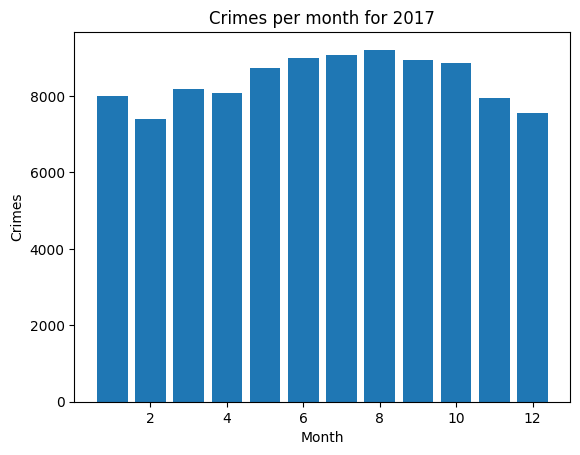

In [51]:
def monthly_crime_graph(year):
  group = crime_df.groupby(['YEAR', 'MONTH'])
  year_df = crime_df.groupby('YEAR')
  month_list = year_df.get_group(year)
  
  months = []
  month_label = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

  for month in range(min(month_list.MONTH), max(month_list.MONTH)+1):
    crimes = len(group.get_group((year, month)))

    months.append(crimes)

  plt.bar(range(min(month_list.MONTH), max(month_list.MONTH)+1), months)
  plt.ylabel('Crimes')
  plt.xlabel('Month')
  plt.title(f'Crimes per month for {year}')

monthly_crime_graph(2017)

#Crimes Per Hour (per month)

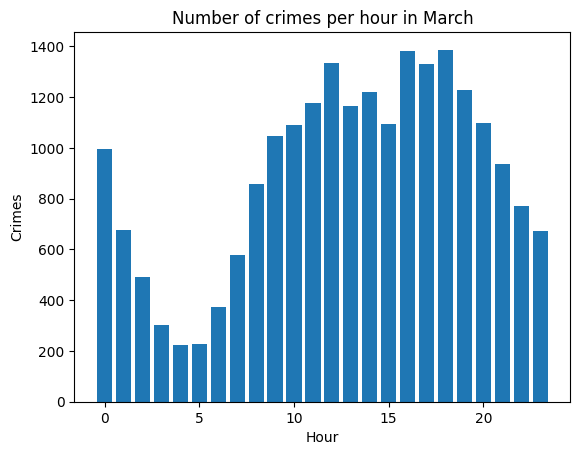

In [52]:
def crimes_hour(month):
  hour_sort = crime_df.groupby(['MONTH', 'HOUR'])

  hours = []

  for hour in range(0, 24):
    hour_group = len(hour_sort.get_group((month, hour)))

    hours.append(hour_group)

  month_word = ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

  plt.bar(range(0, 24), hours)
  plt.ylabel('Crimes')
  plt.xlabel('Hour')
  plt.title(f'Number of crimes per hour in {month_word[month]}')

crimes_hour(2)